In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import dataframe_image as dfi

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [2]:
data = pd.read_csv("data_covid_provinsi.csv")
data = data.set_index('Province')
data.head

<bound method NDFrame.head of                             Confirmed  Recovered  Deaths
Province                                                
DKI Jakarta                      3032        234     287
Jawa Barat                        696         45      59
Jawa Timur                        590         98      54
Sulawesi Selatan                  370         43      25
Jawa Tengah                       349         51      44
Banten                            324          9      34
Bali                              135         38       3
Papua                             107         18       6
Kalimantan Selatan                 96          6       6
Sumatera Selatan                   89          5       3
Sumatera Utara                     81         12       9
Kepulauan Riau                     79          6       7
Sumatera Barat                     72         13       7
Kalimantan Utara                   69          2       1
Daerah Istimewa Yogyakarta         67         27       7
N

In [3]:
data = data.iloc[1:]
data.head

<bound method NDFrame.head of                             Confirmed  Recovered  Deaths
Province                                                
Jawa Barat                        696         45      59
Jawa Timur                        590         98      54
Sulawesi Selatan                  370         43      25
Jawa Tengah                       349         51      44
Banten                            324          9      34
Bali                              135         38       3
Papua                             107         18       6
Kalimantan Selatan                 96          6       6
Sumatera Selatan                   89          5       3
Sumatera Utara                     81         12       9
Kepulauan Riau                     79          6       7
Sumatera Barat                     72         13       7
Kalimantan Utara                   69          2       1
Daerah Istimewa Yogyakarta         67         27       7
Nusa Tenggara Barat                61         11       3
K

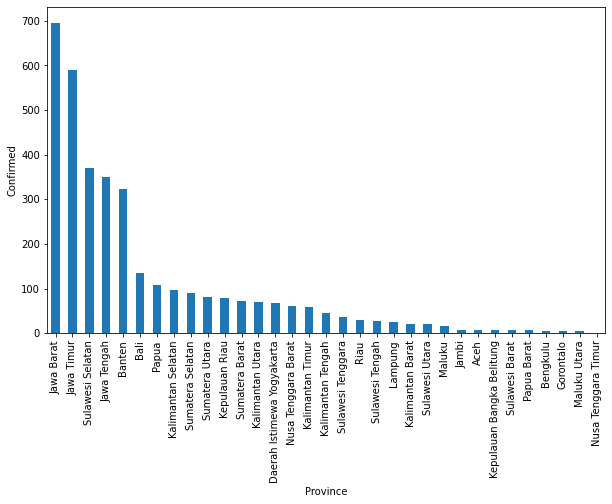

In [4]:
ax = data["Confirmed"].plot.bar(figsize=(10, 6), ylabel="Confirmed")

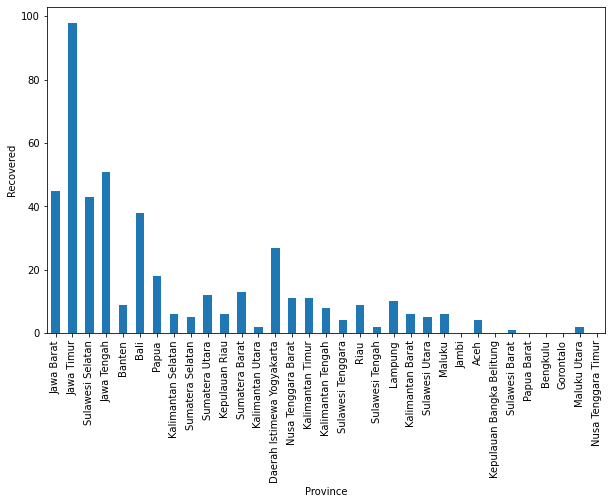

In [5]:
ax = data["Recovered"].plot.bar(figsize=(10, 6), ylabel="Recovered")

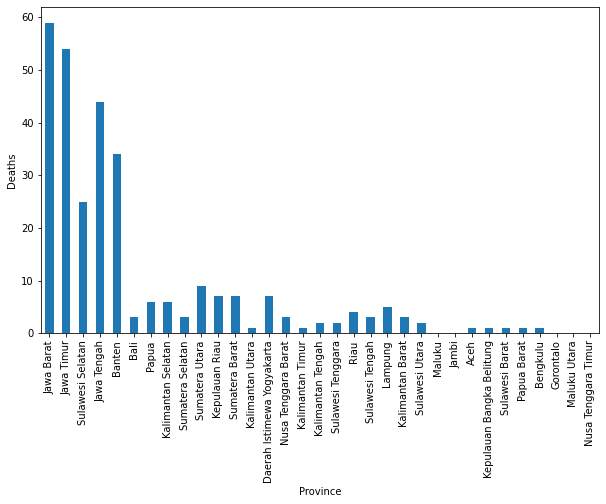

In [6]:
ax = data["Deaths"].plot.bar(figsize=(10, 6), ylabel="Deaths")

In [7]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(data)
data_transformed = minmax_scaler.transform(data)

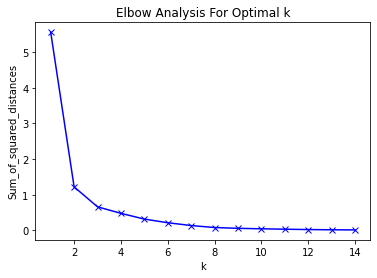

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Analysis For Optimal k')
plt.show()

Text(0.5, 1.0, 'Gap statistic analysis For Optimal k')

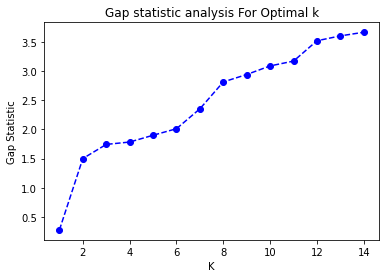

In [9]:
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(data_transformed, nrefs=3, maxClusters=15)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title("Gap statistic analysis For Optimal k")

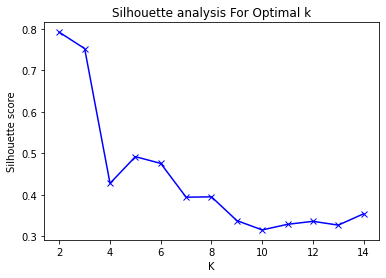

In [10]:
range_n_clusters = range(2, 15)
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_transformed)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(data_transformed, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_transformed)

cluster_labels = kmeans.labels_
clusters = pd.DataFrame(cluster_labels, index=data.index, columns=['Cluster'])

clusters_styled = clusters.style.background_gradient()
dfi.export(clusters_styled,"clusters.png")

AttributeError: 'DataFrame' object has no attribute 'export'

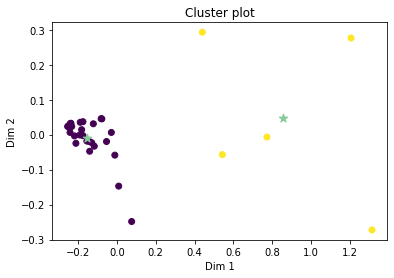

In [146]:
pca = PCA(2)
df = pca.fit_transform(data_transformed)
centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(df[:, 0], df[:, 1], c = cluster_labels)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = '#88c999', marker="*")
plt.xlabel("Dim 1") 
plt.ylabel("Dim 2") 
plt.title("Cluster plot")
plt.show()